In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression

from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error
from joblib import dump,load

In [22]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
x=df[['Glucose']]
y=['Outcome']

<AxesSubplot:xlabel='Glucose', ylabel='Outcome'>

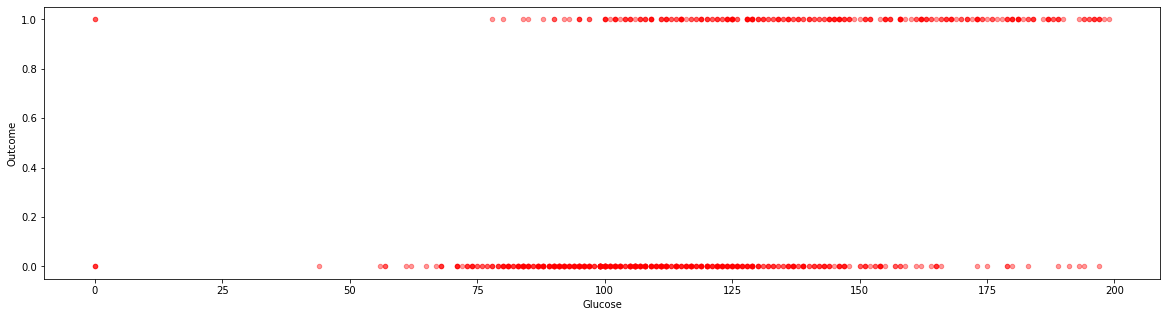

In [24]:
df.plot(kind='scatter',x='Glucose',y='Outcome',color='red',alpha=.4,figsize=(20,5))

In [25]:
x=df[['Glucose','DiabetesPedigreeFunction']]
y=df['Outcome']
scaler=StandardScaler()
scaled=scaler.fit_transform(x)
xtrain,xtest,ytrain,ytest=train_test_split(scaled,y,test_size=.2,random_state=1)
xtrain.shape,xtest.shape

((614, 2), (154, 2))

In [26]:
m=KNeighborsClassifier()
m.fit(xtrain,ytrain)

KNeighborsClassifier()

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [28]:
ypred=m.predict(xtest)

In [29]:
import seaborn as sns

[[88 11]
 [20 35]]


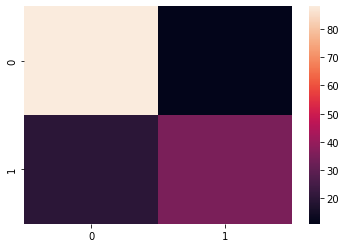

In [30]:
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,xticklabels=['0','1'],yticklabels=['0','1'])
print(cm)

In [31]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



<AxesSubplot:>

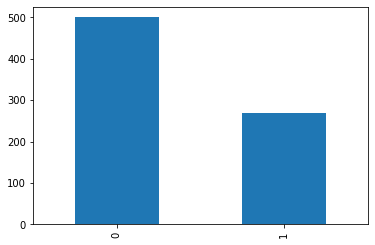

In [32]:
df.Outcome.value_counts().plot(kind='bar')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


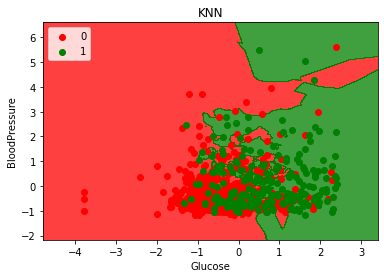

In [33]:
from utils import plot_area_distribution
plot_area_distribution(m,xtrain,ytrain,'KNN','Glucose','BloodPressure')

In [34]:
print("Random Forest")
model2=RandomForestRegressor()
model2.fit(xtrain,ytrain)
print("Score:",model2.score(xtest,ytest)*100)
pred=model2.predict(x)
print("mse:",mean_squared_error(y,pred))
print("mae:",mean_absolute_error(y,pred))

Random Forest
Score: 19.87329994388324
mse: 0.5544557291666666
mae: 0.6241927083333333


C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [35]:
print("Decision Tree")
model1=DecisionTreeRegressor(max_depth=25)
model1.fit(xtrain,ytrain)
print("Score:",model1.score(xtest,ytest)*100)
pred=model1.predict(x)
print("mse:",mean_squared_error(y,pred))
print("mae:",mean_absolute_error(y,pred))

Decision Tree
Score: -35.757575757575786
mse: 0.6484375
mae: 0.6484375


C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [36]:
print("Linear Regression")
model3=LinearRegression()
model3.fit(xtrain,ytrain)
print("Score:",model3.score(xtest,ytest)*100)
pred=model3.predict(x)
print("mse:",mean_squared_error(y,pred))
print("mae:",mean_absolute_error(y,pred))

Linear Regression
Score: 19.58487684963587
mse: 777.5815638862092
mae: 27.014470828569884


C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [37]:
print("KNN")
model4=KNeighborsClassifier()
model4.fit(xtrain,ytrain)
print("Score:",model3.score(xtest,ytest)*100)
pred=model3.predict(x)
print("mse:",mean_squared_error(y,pred))
print("mae:",mean_absolute_error(y,pred))

KNN
Score: 19.58487684963587
mse: 777.5815638862092
mae: 27.014470828569884


C:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [38]:
params= {
    'weights' : ('uniform', 'distance')
}
params

{'weights': ('uniform', 'distance')}

In [39]:
grid= GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,cv=3,n_jobs=-1,verbose=3)

In [40]:
grid.fit(x,y)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'weights': ('uniform', 'distance')}, verbose=3)